In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [3]:
### Your code is here
num_col = data.select_dtypes(include=['float64', 'int64']).drop(['Previously_Insured','Response', 'Driving_License'], axis = 1).columns
cat_col = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Driving_License']

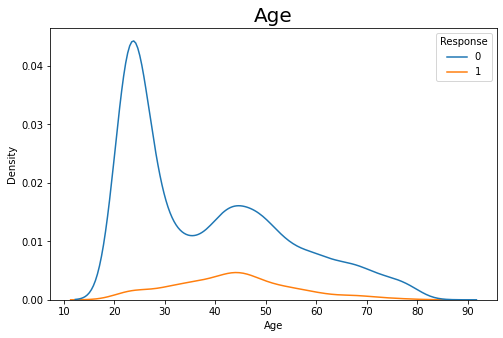

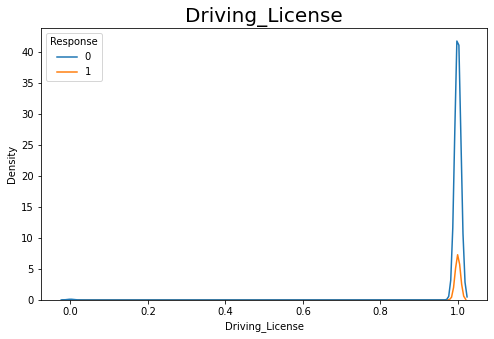

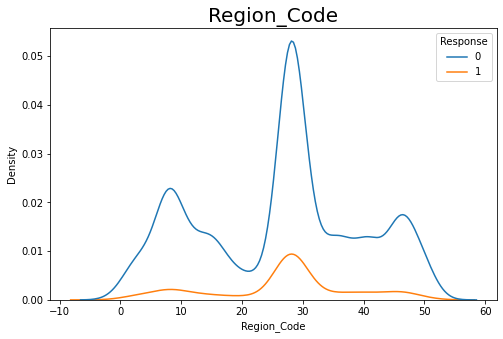

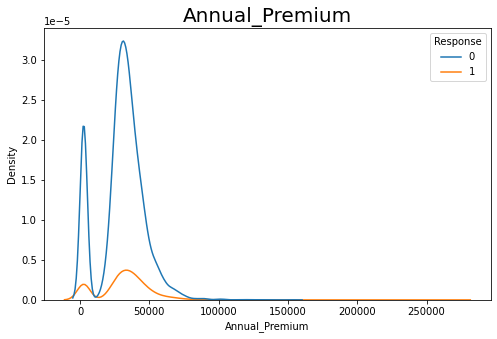

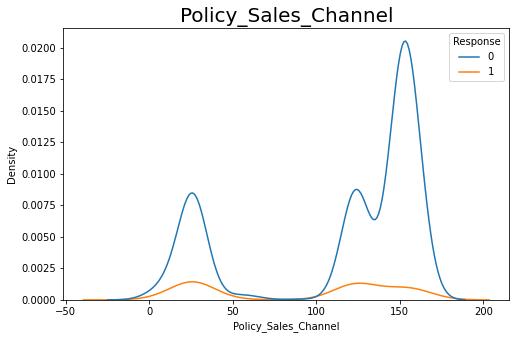

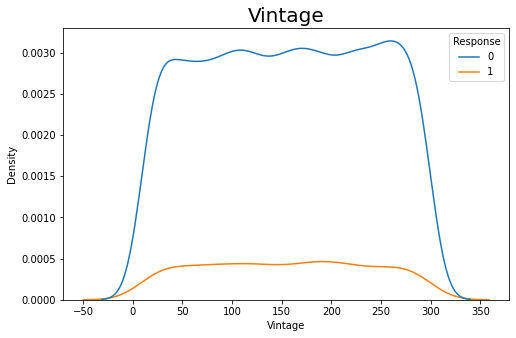

In [26]:
for col in num_col:
    plt.title(col, {'fontsize':20})
    sns.kdeplot(data =data, x = col, hue = 'Response')
    plt.show()

<AxesSubplot:>

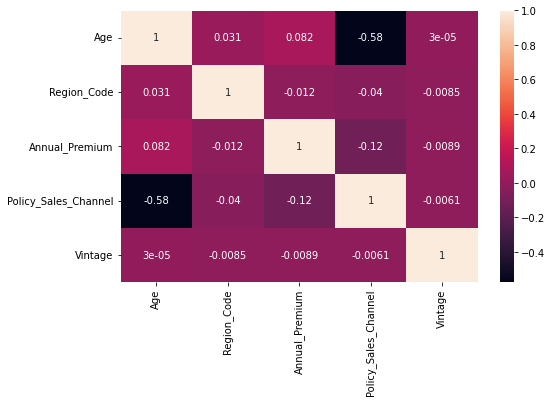

In [35]:
sns.heatmap(data[num_col].corr(), annot=True)

In [4]:
obj_col = data.select_dtypes(include='object').columns
for col in obj_col:
    print(col,':')
    print(data[col].unique())

Gender :
['Male' 'Female']
Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage :
['Yes' 'No']


In [5]:
ohe = pd.get_dummies(data[obj_col], drop_first=True)

In [6]:
new_data = pd.concat([data.drop(obj_col, axis = 1), ohe], axis = 1)

In [48]:
new_data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,1,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,1,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,1,14.0,1,25426.0,152.0,247,0,0,1,0,0


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

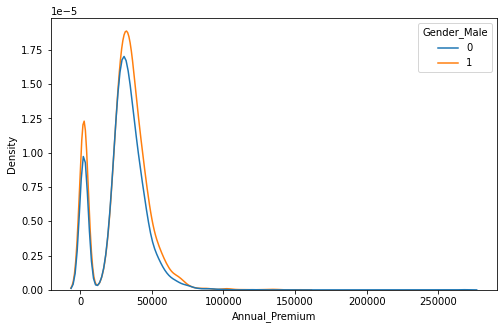

In [52]:
sns.kdeplot(data= new_data, x = 'Annual_Premium', hue = 'Gender_Male')

<AxesSubplot:xlabel='Vehicle_Damage_Yes', ylabel='count'>

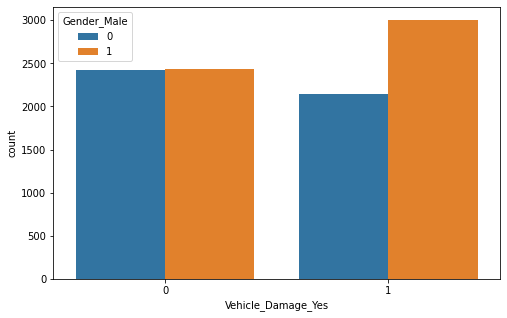

In [55]:
sns.countplot(data = new_data, x = 'Vehicle_Damage_Yes', hue = 'Gender_Male')

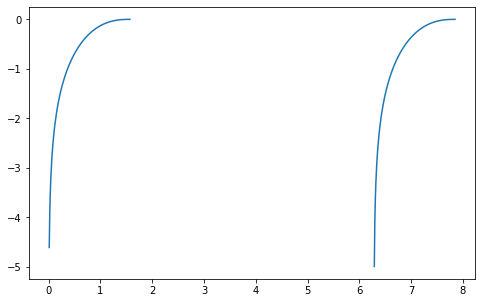

In [87]:
# a = input("Введите своё имя ")
np.

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = new_data.drop('Response', axis=1)
y = new_data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=1, random_state=1, n_estimators=100)
gb.fit(X_train, y_train)
### Your code is here
test_pred = gb.predict(X_test)
train_pred = gb.predict(X_train)

In [9]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

0.828168754605748


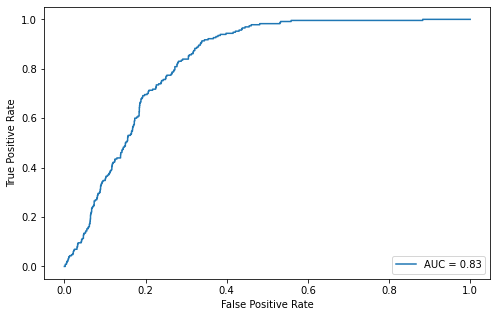

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
print(roc_auc)

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [11]:
### Задаем сетку параметров
from sklearn.metrics import f1_score
n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [12]:
f1_score_list = []
for n_est in n_estimators_list:
    for rate in learning_rate_list:
        f1_score_list.append((n_est, rate, f1_score(y_test,
                 GradientBoostingClassifier(learning_rate=rate,
                                            random_state=1,
                                            n_estimators=n_est)\
                .fit(X_train, y_train).predict(X_test), average='weighted')))

In [17]:
df_f1_sc = pd.DataFrame(f1_score_list).pivot(index=0, columns=1, values=2)

<AxesSubplot:xlabel='1', ylabel='0'>

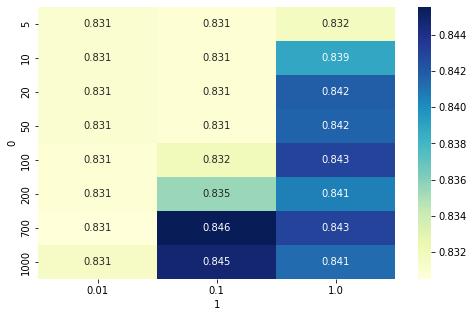

In [22]:
sns.heatmap(df_f1_sc, annot=True, cmap="YlGnBu", fmt ='.3g')

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [23]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here

In [45]:
f1_score_list_1 = []
for n_est in n_estimators_list:
    tast_1 = RandomForestClassifier(max_depth = 5, n_estimators = n_est)
    tast_1.fit(X_test, y_test)
    f1_score_list_1.append((n_est, f1_score(y_test,
                 tast_1.predict(X_test), average='weighted')))

<AxesSubplot:xlabel='0', ylabel='1'>

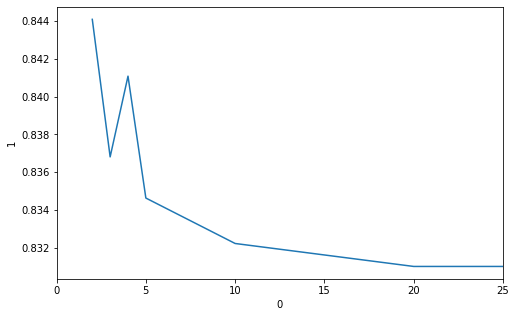

In [46]:
plt.xlim(0,25)
sns.lineplot(data = pd.DataFrame(f1_score_list_1),
            x = 0,
            y = 1)

In [34]:
#Случайный лес с максимальной глубиной деревьев 5000
f1_score_list_1 = []
for n_est in n_estimators_list:
    tast_1 = RandomForestClassifier(max_depth = 5000, n_estimators = n_est)
    tast_1.fit(X_test, y_test)
    f1_score_list_1.append((n_est, f1_score(y_test,
                 tast_1.predict(X_test), average='weighted')))

<AxesSubplot:xlabel='0', ylabel='1'>

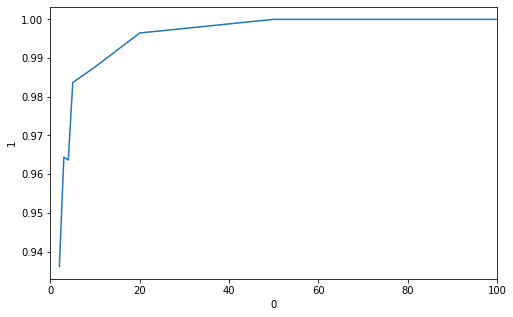

In [38]:
plt.xlim(0,100)
sns.lineplot(data = pd.DataFrame(f1_score_list_1),
            x = 0,
            y = 1)

In [39]:
#Градиентный бустинг с максимальной глубиной деревьев 5
f1_score_list_1 = []
for n_est in n_estimators_list:
    tast_1 = GradientBoostingClassifier(max_depth = 5, n_estimators = n_est)
    tast_1.fit(X_test, y_test)
    f1_score_list_1.append((n_est, f1_score(y_test,
                 tast_1.predict(X_test), average='weighted')))

<AxesSubplot:xlabel='0', ylabel='1'>

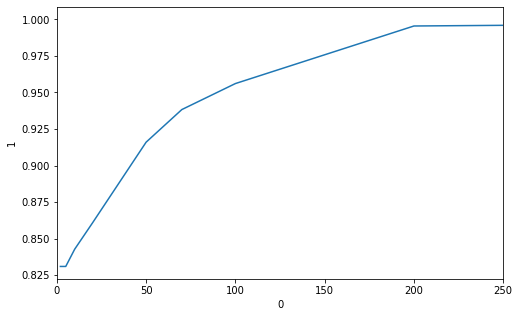

In [41]:
plt.xlim(0,250)
sns.lineplot(data = pd.DataFrame(f1_score_list_1),
            x = 0,
            y = 1)

In [42]:
#Градиентный бустинг с максимальной глубиной деревьев 5000
f1_score_list_1 = []
for n_est in n_estimators_list:
    tast_1 = GradientBoostingClassifier(max_depth = 5000, n_estimators = n_est)
    tast_1.fit(X_test, y_test)
    f1_score_list_1.append((n_est, f1_score(y_test,
                 tast_1.predict(X_test), average='weighted')))

<AxesSubplot:xlabel='0', ylabel='1'>

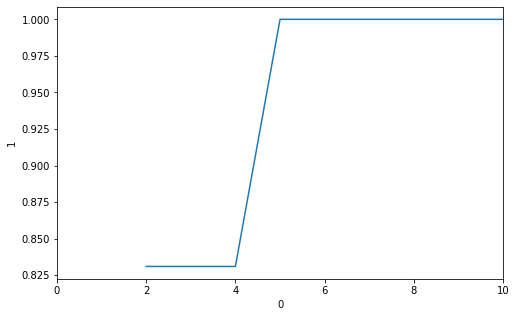

In [44]:
plt.xlim(0,10)
sns.lineplot(data = pd.DataFrame(f1_score_list_1),
            x = 0,
            y = 1)

In [47]:
### Обучим на заданных параметрах различные модели

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]
f1_matrix = np.zeros((len(n_estimators_list), 8))

for (j, max_depth) in enumerate([5, 5000]):
    for (i, n) in enumerate(n_estimators_list):

        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    random_state=1)
        rf.fit(X_train, y_train)
        rf_pred_test, rf_pred_train = rf.predict(X_test), rf.predict(X_train)

        lgb = GradientBoostingClassifier(n_estimators=n,
                                         max_depth=max_depth,
                                         random_state=1)
        lgb.fit(X_train, y_train)
        lgb_pred_test, lgb_pred_train = lgb.predict(X_test), lgb.predict(X_train)
        
        f1_matrix[i, j*4:j*4+4] = (f1_score(y_test, rf_pred_test, average='weighted'),
                                   f1_score(y_train, rf_pred_train, average='weighted'),
                                   f1_score(y_test, lgb_pred_test, average='weighted'),
                                   f1_score(y_train, lgb_pred_train, average='weighted'))
        
trees = list(map(str, n_estimators_list))

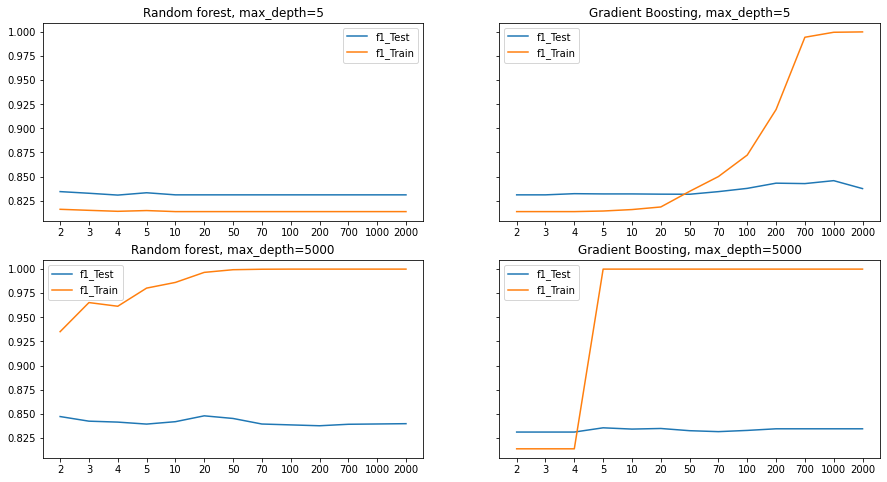

In [48]:
### Нарисуем обучающие кривые

fig, axs = plt.subplots(2, 2, figsize = (15, 8), sharey=True)

for (i, ax) in enumerate(axs.reshape(-1)):
    ax.plot(trees, f1_matrix[:, i*2], label = 'f1_Test')
    ax.plot(trees, f1_matrix[:, i*2+1], label = 'f1_Train')
    ax.legend()
    
axs[0, 0].set_title('Random forest, max_depth=5')
axs[1, 0].set_title('Random forest, max_depth=5000')

axs[0, 1].set_title('Gradient Boosting, max_depth=5')
axs[1, 1].set_title('Gradient Boosting, max_depth=5000');

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [49]:
from catboost import CatBoostClassifier

### Your code is here



In [57]:
X_cat = data.drop('Response', axis=1)
y_cat = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [58]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
7389,Male,60,1,4.0,0,1-2 Year,Yes,30498.0,124.0,228
9275,Female,23,1,8.0,1,< 1 Year,No,45193.0,152.0,186
2995,Male,74,1,46.0,0,> 2 Years,Yes,2630.0,11.0,231
5316,Female,51,1,28.0,0,1-2 Year,Yes,35828.0,26.0,80
356,Male,22,1,46.0,1,< 1 Year,Yes,28311.0,152.0,240
...,...,...,...,...,...,...,...,...,...,...
9225,Female,24,1,30.0,1,< 1 Year,No,45167.0,152.0,57
4859,Female,46,1,28.0,1,1-2 Year,No,27433.0,124.0,274
3264,Female,40,1,28.0,0,> 2 Years,Yes,44575.0,26.0,88
9845,Male,51,1,16.0,0,1-2 Year,No,24198.0,152.0,81


In [60]:
cat = CatBoostClassifier(random_state=1)
cat.fit(X_train, y_train, cat_features=['Vehicle_Age', 'Vehicle_Damage', 'Gender'])
print('Метрика на тесте:'+str(f1_score(y_test, cat.predict(X_test), average='weighted')))
print('Метрика на трейне:'+str(f1_score(y_train, cat.predict(X_train), average='weighted')))

Learning rate set to 0.025035
0:	learn: 0.6585225	total: 49.2ms	remaining: 49.2s
1:	learn: 0.6268982	total: 83.5ms	remaining: 41.7s
2:	learn: 0.5928588	total: 118ms	remaining: 39.3s
3:	learn: 0.5650766	total: 155ms	remaining: 38.6s
4:	learn: 0.5422486	total: 195ms	remaining: 38.9s
5:	learn: 0.5180757	total: 241ms	remaining: 39.9s
6:	learn: 0.4967701	total: 283ms	remaining: 40.2s
7:	learn: 0.4783631	total: 319ms	remaining: 39.5s
8:	learn: 0.4615549	total: 356ms	remaining: 39.2s
9:	learn: 0.4527304	total: 394ms	remaining: 39s
10:	learn: 0.4445958	total: 439ms	remaining: 39.5s
11:	learn: 0.4300633	total: 483ms	remaining: 39.8s
12:	learn: 0.4153701	total: 525ms	remaining: 39.9s
13:	learn: 0.4046506	total: 562ms	remaining: 39.6s
14:	learn: 0.3953227	total: 599ms	remaining: 39.3s
15:	learn: 0.3908375	total: 635ms	remaining: 39.1s
16:	learn: 0.3866243	total: 675ms	remaining: 39s
17:	learn: 0.3780907	total: 726ms	remaining: 39.6s
18:	learn: 0.3711807	total: 778ms	remaining: 40.2s
19:	learn: 0.

160:	learn: 0.2657206	total: 6.36s	remaining: 33.1s
161:	learn: 0.2656514	total: 6.4s	remaining: 33.1s
162:	learn: 0.2655979	total: 6.44s	remaining: 33.1s
163:	learn: 0.2654579	total: 6.48s	remaining: 33s
164:	learn: 0.2653359	total: 6.51s	remaining: 33s
165:	learn: 0.2651182	total: 6.55s	remaining: 32.9s
166:	learn: 0.2650201	total: 6.59s	remaining: 32.9s
167:	learn: 0.2648822	total: 6.63s	remaining: 32.8s
168:	learn: 0.2647958	total: 6.67s	remaining: 32.8s
169:	learn: 0.2646261	total: 6.72s	remaining: 32.8s
170:	learn: 0.2645267	total: 6.75s	remaining: 32.7s
171:	learn: 0.2644352	total: 6.79s	remaining: 32.7s
172:	learn: 0.2643088	total: 6.83s	remaining: 32.6s
173:	learn: 0.2641748	total: 6.87s	remaining: 32.6s
174:	learn: 0.2641736	total: 6.89s	remaining: 32.5s
175:	learn: 0.2640845	total: 6.92s	remaining: 32.4s
176:	learn: 0.2639924	total: 6.96s	remaining: 32.4s
177:	learn: 0.2639437	total: 7s	remaining: 32.3s
178:	learn: 0.2639045	total: 7.04s	remaining: 32.3s
179:	learn: 0.263887

323:	learn: 0.2523417	total: 12.2s	remaining: 25.5s
324:	learn: 0.2522911	total: 12.2s	remaining: 25.4s
325:	learn: 0.2521792	total: 12.3s	remaining: 25.4s
326:	learn: 0.2521001	total: 12.3s	remaining: 25.4s
327:	learn: 0.2520093	total: 12.4s	remaining: 25.3s
328:	learn: 0.2519178	total: 12.4s	remaining: 25.3s
329:	learn: 0.2518158	total: 12.4s	remaining: 25.2s
330:	learn: 0.2517506	total: 12.5s	remaining: 25.2s
331:	learn: 0.2516526	total: 12.5s	remaining: 25.2s
332:	learn: 0.2516209	total: 12.5s	remaining: 25.1s
333:	learn: 0.2515154	total: 12.6s	remaining: 25.1s
334:	learn: 0.2514443	total: 12.6s	remaining: 25.1s
335:	learn: 0.2513890	total: 12.7s	remaining: 25s
336:	learn: 0.2513010	total: 12.7s	remaining: 25s
337:	learn: 0.2512375	total: 12.7s	remaining: 25s
338:	learn: 0.2511954	total: 12.8s	remaining: 24.9s
339:	learn: 0.2511491	total: 12.8s	remaining: 24.9s
340:	learn: 0.2510522	total: 12.8s	remaining: 24.8s
341:	learn: 0.2510393	total: 12.9s	remaining: 24.8s
342:	learn: 0.2509

485:	learn: 0.2384319	total: 18.3s	remaining: 19.3s
486:	learn: 0.2383375	total: 18.3s	remaining: 19.3s
487:	learn: 0.2382230	total: 18.4s	remaining: 19.3s
488:	learn: 0.2381990	total: 18.4s	remaining: 19.2s
489:	learn: 0.2381012	total: 18.4s	remaining: 19.2s
490:	learn: 0.2380654	total: 18.5s	remaining: 19.1s
491:	learn: 0.2379486	total: 18.5s	remaining: 19.1s
492:	learn: 0.2378439	total: 18.6s	remaining: 19.1s
493:	learn: 0.2377524	total: 18.6s	remaining: 19s
494:	learn: 0.2376649	total: 18.6s	remaining: 19s
495:	learn: 0.2375618	total: 18.7s	remaining: 19s
496:	learn: 0.2374686	total: 18.7s	remaining: 18.9s
497:	learn: 0.2373942	total: 18.7s	remaining: 18.9s
498:	learn: 0.2373051	total: 18.8s	remaining: 18.9s
499:	learn: 0.2372802	total: 18.8s	remaining: 18.8s
500:	learn: 0.2371608	total: 18.8s	remaining: 18.8s
501:	learn: 0.2370028	total: 18.9s	remaining: 18.7s
502:	learn: 0.2368715	total: 18.9s	remaining: 18.7s
503:	learn: 0.2368549	total: 19s	remaining: 18.7s
504:	learn: 0.236845

645:	learn: 0.2263265	total: 24.3s	remaining: 13.3s
646:	learn: 0.2262772	total: 24.3s	remaining: 13.3s
647:	learn: 0.2261862	total: 24.3s	remaining: 13.2s
648:	learn: 0.2261196	total: 24.4s	remaining: 13.2s
649:	learn: 0.2260320	total: 24.4s	remaining: 13.1s
650:	learn: 0.2259317	total: 24.5s	remaining: 13.1s
651:	learn: 0.2258543	total: 24.5s	remaining: 13.1s
652:	learn: 0.2257603	total: 24.5s	remaining: 13s
653:	learn: 0.2256506	total: 24.6s	remaining: 13s
654:	learn: 0.2256336	total: 24.6s	remaining: 13s
655:	learn: 0.2256160	total: 24.6s	remaining: 12.9s
656:	learn: 0.2255601	total: 24.7s	remaining: 12.9s
657:	learn: 0.2254529	total: 24.7s	remaining: 12.8s
658:	learn: 0.2254360	total: 24.8s	remaining: 12.8s
659:	learn: 0.2253622	total: 24.8s	remaining: 12.8s
660:	learn: 0.2252992	total: 24.8s	remaining: 12.7s
661:	learn: 0.2252470	total: 24.9s	remaining: 12.7s
662:	learn: 0.2251457	total: 24.9s	remaining: 12.7s
663:	learn: 0.2250688	total: 24.9s	remaining: 12.6s
664:	learn: 0.2250

806:	learn: 0.2155364	total: 30.3s	remaining: 7.25s
807:	learn: 0.2154736	total: 30.4s	remaining: 7.22s
808:	learn: 0.2154078	total: 30.4s	remaining: 7.18s
809:	learn: 0.2153218	total: 30.5s	remaining: 7.14s
810:	learn: 0.2152783	total: 30.5s	remaining: 7.11s
811:	learn: 0.2152187	total: 30.5s	remaining: 7.07s
812:	learn: 0.2151556	total: 30.6s	remaining: 7.03s
813:	learn: 0.2150256	total: 30.6s	remaining: 6.99s
814:	learn: 0.2149799	total: 30.6s	remaining: 6.96s
815:	learn: 0.2148956	total: 30.7s	remaining: 6.92s
816:	learn: 0.2148440	total: 30.7s	remaining: 6.88s
817:	learn: 0.2148177	total: 30.8s	remaining: 6.84s
818:	learn: 0.2147520	total: 30.8s	remaining: 6.8s
819:	learn: 0.2146727	total: 30.8s	remaining: 6.77s
820:	learn: 0.2146149	total: 30.9s	remaining: 6.73s
821:	learn: 0.2145481	total: 30.9s	remaining: 6.69s
822:	learn: 0.2145290	total: 30.9s	remaining: 6.66s
823:	learn: 0.2144299	total: 31s	remaining: 6.62s
824:	learn: 0.2143556	total: 31s	remaining: 6.58s
825:	learn: 0.214

967:	learn: 0.2049200	total: 36.4s	remaining: 1.2s
968:	learn: 0.2048438	total: 36.4s	remaining: 1.17s
969:	learn: 0.2047847	total: 36.5s	remaining: 1.13s
970:	learn: 0.2047298	total: 36.5s	remaining: 1.09s
971:	learn: 0.2046505	total: 36.5s	remaining: 1.05s
972:	learn: 0.2045516	total: 36.6s	remaining: 1.01s
973:	learn: 0.2044825	total: 36.6s	remaining: 977ms
974:	learn: 0.2044221	total: 36.6s	remaining: 940ms
975:	learn: 0.2044035	total: 36.7s	remaining: 902ms
976:	learn: 0.2043275	total: 36.7s	remaining: 864ms
977:	learn: 0.2042445	total: 36.8s	remaining: 827ms
978:	learn: 0.2041800	total: 36.8s	remaining: 789ms
979:	learn: 0.2041342	total: 36.8s	remaining: 752ms
980:	learn: 0.2040603	total: 36.9s	remaining: 714ms
981:	learn: 0.2040376	total: 36.9s	remaining: 677ms
982:	learn: 0.2039055	total: 36.9s	remaining: 639ms
983:	learn: 0.2038255	total: 37s	remaining: 601ms
984:	learn: 0.2037586	total: 37s	remaining: 564ms
985:	learn: 0.2037083	total: 37.1s	remaining: 526ms
986:	learn: 0.203

<AxesSubplot:xlabel='0', ylabel='1'>

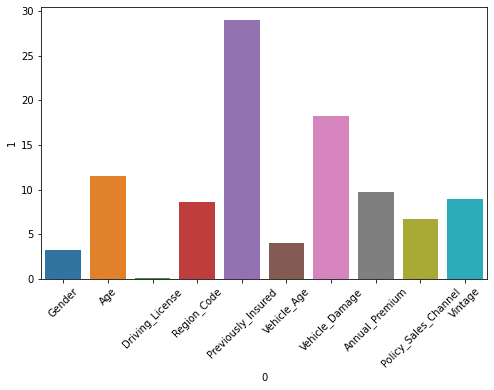

In [68]:
plt.xticks(rotation=45)
sns.barplot(data = pd.DataFrame([X_cat.columns,cat.feature_importances_]).transpose(),
           x = 0, y = 1)

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

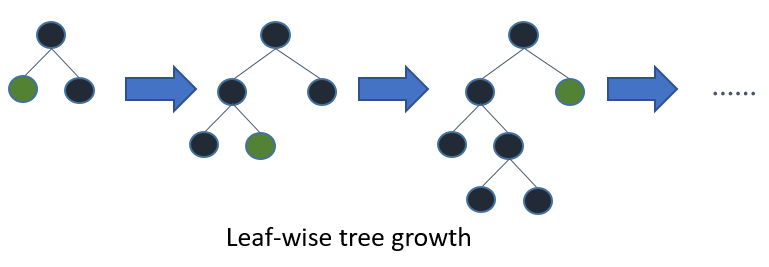

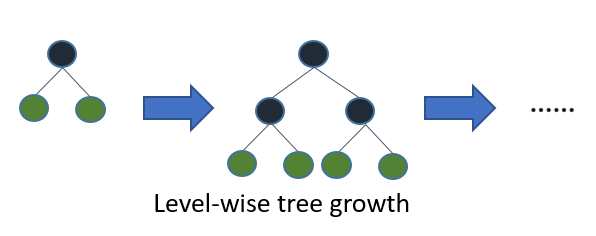

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [72]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

X = new_data.drop('Response', axis=1)
y = new_data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

%time
params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

grid = GridSearchCV(LGBMClassifier(), params)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))




CPU times: total: 0 ns
Wall time: 0 ns
              precision    recall  f1-score   support

           0     0.8850    1.0000    0.9390      1770
           1     0.0000    0.0000    0.0000       230

    accuracy                         0.8850      2000
   macro avg     0.4425    0.5000    0.4695      2000
weighted avg     0.7832    0.8850    0.8310      2000



In [69]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\egor2\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip
